In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('medical_cost.csv') # import the data

In [3]:
df.head()

,Id,age,sex,bmi,children,smoker,region,charges
0,1,19,female,27.900,0,yes,southwest,16884.92400
1,2,18,male,33.770,1,no,southeast,1725.55230
2,3,28,male,33.000,3,no,southeast,4449.46200
3,4,33,male,22.705,0,no,northwest,21984.47061
4,5,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.duplicated().sum() # checking for duplicates

0

In [5]:
df.isnull().sum() # checking for null values

Id          0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [7]:
df.describe()

,Id,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,669.500000,39.207025,30.663397,1.094918,13270.422265
std,386.391641,14.049960,6.098187,1.205493,12110.011237
min,1.000000,18.000000,15.960000,0.000000,1121.873900
25%,335.250000,27.000000,26.296250,0.000000,4740.287150
50%,669.500000,39.000000,30.400000,1.000000,9382.033000
75%,1003.750000,51.000000,34.693750,2.000000,16639.912515
max,1338.000000,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.drop('Id', axis=1, inplace=True) #drop a id column

In [9]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
# getting the count of categorical data
print(df['sex'].unique())
print(df['smoker'].unique())
print(df['region'].unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [11]:
# use one-hot encoding to convert the data to 1 and 0
final_df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True, dtype='int')

In [12]:
final_df # final dataset ready for model training

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [13]:
print(df.shape)
print(final_df.shape)

(1338, 7)
(1338, 9)


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x = final_df.drop('charges', axis=1)
y = final_df['charges']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) #splitting data into training and test set

In [17]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 8)
(268, 8)
(1070,)
(268,)


In [18]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
#model training and testing
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest Regressor": RandomForestRegressor()
}

In [159]:
# model evaluation and selection
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
    test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)

    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)

    print(f"Model: {model_name}")
    print(f"Train RMSE: {train_rmse:.2f} | Test RMSE: {test_rmse:.2f}")
    print(f"Train R-squared (R2): {train_r2:.4f} | Test R-squared (R2): {test_r2:.4f}")
    print("=" * 50)
    

Model: Linear Regression
Train RMSE: 6105.55 | Test RMSE: 5796.28
Train R-squared (R2): 0.7417 | Test R-squared (R2): 0.7836
Model: Ridge Regression
Train RMSE: 6105.79 | Test RMSE: 5800.43
Train R-squared (R2): 0.7417 | Test R-squared (R2): 0.7833
Model: Lasso Regression
Train RMSE: 6105.55 | Test RMSE: 5797.03
Train R-squared (R2): 0.7417 | Test R-squared (R2): 0.7835
Model: Random Forest Regressor
Train RMSE: 1874.45 | Test RMSE: 4581.95
Train R-squared (R2): 0.9757 | Test R-squared (R2): 0.8648


In [21]:
# hyperparameter tuning for Random Forest Regressor
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [22]:
from sklearn.model_selection import RandomizedSearchCV

In [114]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
                'bootstrap': [True, False],
    'min_impurity_decrease': [0.0, 0.1],
    'random_state': [42]}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['sqrt', 'log2'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10], 'bootstrap': [True, False], 'min_impurity_decrease': [0.0, 0.1], 'random_state': [42]}


In [181]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, scoring='neg_mean_squared_error', n_iter=10, verbose=2, cv=5, n_jobs=-1)

In [182]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_impurity_decrease': [0.0, 0.1],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200],
                                        'random_state': [42]},
                   scoring='neg_mean_squared_error', verbose=2)

In [183]:
rf_random.best_params_ # get the best parameters

{'random_state': 42,
 'n_estimators': 700,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'min_impurity_decrease': 0.0,
 'max_features': 'log2',
 'max_depth': 30,
 'bootstrap': True}

In [184]:
# prediction on training data
y_pred_train_rf = rf_random.predict(x_train)
    
# prediction on test data
y_pred_test_rf= rf_random.predict(x_test)

In [185]:
# model evaluation
train_rmse_rf = mean_squared_error(y_train, y_pred_train_rf, squared=False)
test_rmse_rf = mean_squared_error(y_test, y_pred_test_rf, squared=False)

train_r2_rf = r2_score(y_train, y_pred_train_rf)
test_r2_rf = r2_score(y_test, y_pred_test_rf)

print(f'Random Forest Regressor rmse score for train data: {train_rmse_rf:.2f}.')
print(f'Random Forest Regressor rmse score for test data: {test_rmse_rf:.2f}.')
print(f'Random Forest Regressor r2 score for train data: {train_r2_rf:.4f}.')
print(f'Random Forest Regressor r2 score for test data: {test_r2_rf:.4f}.')

Random Forest Regressor rmse score for train data: 3074.96.
Random Forest Regressor rmse score for test data: 4468.49.
Random Forest Regressor r2 score for train data: 0.9345.
Random Forest Regressor r2 score for test data: 0.8714.


In [186]:
# make a function to plot the prediction and residuals.
def plot_actual_vs_predicted(actual, predicted, title="Actual vs. Predicted", plot_residuals=True):
    """
    Plot distribution of actual vs. predicted values and optionally residual plot.

    Args:
        actual (array-like): Actual target values.
        predicted (array-like): Predicted target values.
        title (str): Title for the plot (default is "Actual vs. Predicted").
        plot_residuals (bool): Whether to plot a residual plot (default is True).
    """
    plt.figure(figsize=(12, 5))

    # Plot distribution of Actual vs. Predicted values
    plt.subplot(1, 2, 1)
    sns.histplot(actual, bins=30, color='g', kde=True, label='Actual', alpha=0.5)
    sns.histplot(predicted, bins=30, color='b', kde=True, label='Predicted', alpha=0.5)
    plt.title(title)
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(True)

    # Calculate residuals
    residuals = actual - predicted

    # Plot Residuals
    if plot_residuals:
        plt.subplot(1, 2, 2)
        sns.histplot(residuals, bins=30, kde=True, color='r')
        plt.title("Residual Plot")
        plt.xlabel("Residuals")
        plt.ylabel("Frequency")
        plt.grid(True)

    plt.tight_layout()
    plt.show()


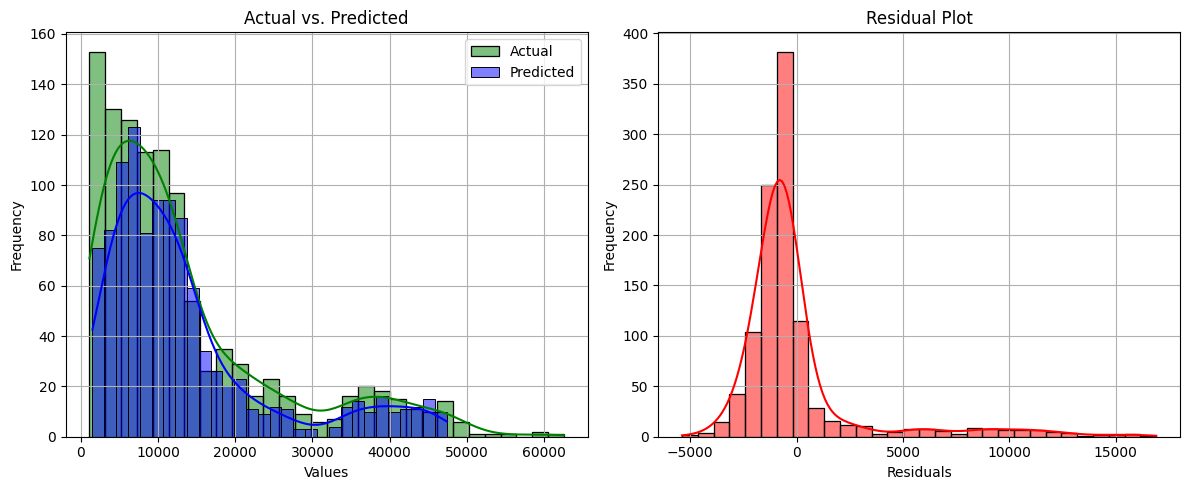

In [187]:
plot_actual_vs_predicted(y_train, y_pred_train_rf) # prediction on training set

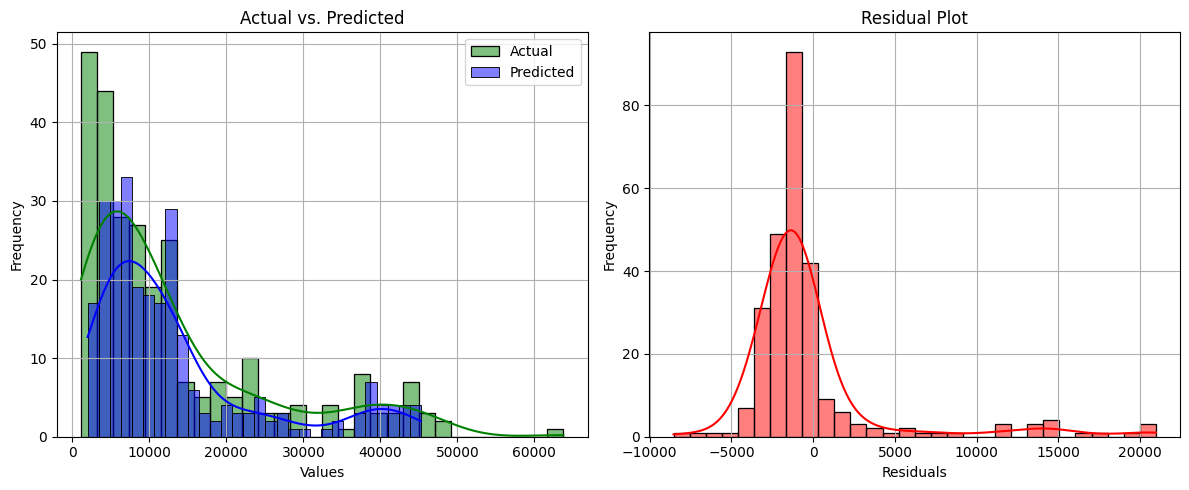

In [188]:
plot_actual_vs_predicted(y_test, y_pred_test_rf) #prediction on test set

In [189]:
# creating new dataset for model testing
random_samples = final_df.sample(100)
new_data = random_samples.drop(columns=['charges'])

In [190]:
new_data.head(10)

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1107,50,26.220,2,0,0,1,0,0
1228,56,34.430,0,1,0,0,1,0
716,49,22.610,1,0,0,1,0,0
134,20,28.785,0,0,0,0,0,0
920,62,25.000,0,0,0,0,0,1
845,60,32.450,0,0,1,0,1,0
380,27,17.955,2,0,1,0,0,0
1271,25,34.485,0,0,0,1,0,0
748,47,36.000,1,0,0,0,0,1
580,59,25.460,1,1,0,0,0,0


In [191]:
new_data_pred = rf_random.predict(new_data) # new data prediction
new_data_pred[:5]

array([12728.9555456 , 13082.56036381, 10756.08878505,  2866.70572487,
       14098.32505727])

In [192]:
new_target = random_samples['charges']
new_data_rmse = mean_squared_error(new_target, new_data_pred, squared=False)
new_data_r2 = r2_score(new_target, new_data_pred)

print(f'rmse score for new data {new_data_rmse:.2f}')
print(f'r2 score for new data {new_data_r2:.4f}')

rmse score for new data 3989.78
r2 score for new data 0.8753


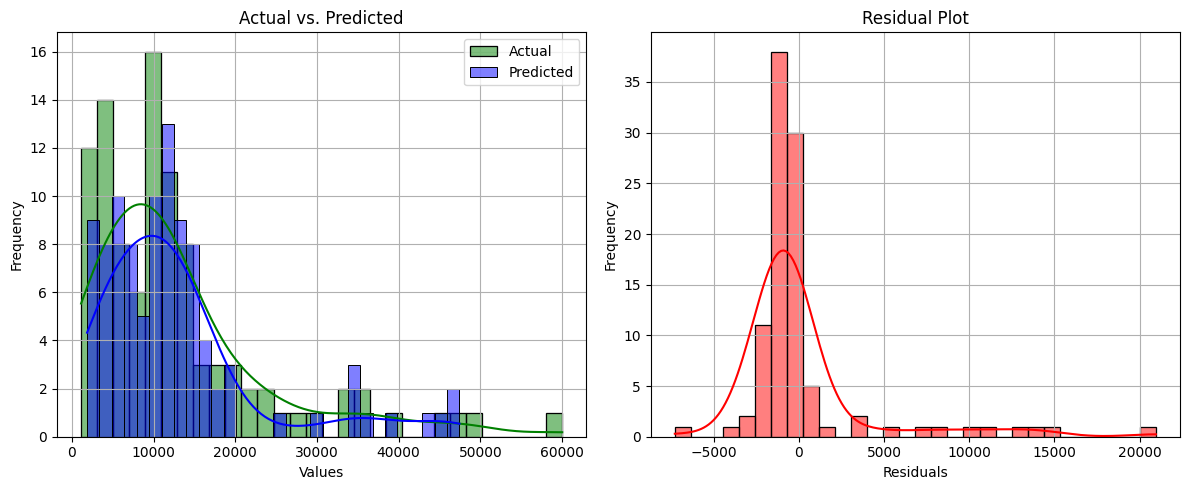

In [193]:
plot_actual_vs_predicted(new_target, new_data_pred) # plotting the performance on new data